# Microsoft Movie Analysis

**Author:** [Gustavo Villagrana](mailto:gusvilla303@gmail.com)
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Microsoft-Movie-Analysis" data-toc-modified-id="Microsoft-Movie-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Microsoft Movie Analysis</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Data-Modeling" data-toc-modified-id="Data-Modeling-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data Modeling</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Cleaning-the-Data" data-toc-modified-id="Cleaning-the-Data-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Cleaning the Data</a></span><ul class="toc-item"><li><span><a href="#Title-Basics-data" data-toc-modified-id="Title-Basics-data-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Title Basics data</a></span></li><li><span><a href="#Title-Ratings-data" data-toc-modified-id="Title-Ratings-data-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Title Ratings data</a></span></li><li><span><a href="#Movie-Gross-data" data-toc-modified-id="Movie-Gross-data-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Movie Gross data</a></span></li><li><span><a href="#Movie-Budget-data" data-toc-modified-id="Movie-Budget-data-1.8.4"><span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>Movie Budget data</a></span></li></ul></li><li><span><a href="#Joining-the-Data" data-toc-modified-id="Joining-the-Data-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Joining the Data</a></span><ul class="toc-item"><li><span><a href="#Duplicate-Titles-in-Data" data-toc-modified-id="Duplicate-Titles-in-Data-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Duplicate Titles in Data</a></span></li></ul></li><li><span><a href="#Working-with-Genres" data-toc-modified-id="Working-with-Genres-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Working with Genres</a></span><ul class="toc-item"><li><span><a href="#Groupby-List-of-Genres" data-toc-modified-id="Groupby-List-of-Genres-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Groupby List of Genres</a></span></li></ul></li><li><span><a href="#Plot-Genres-vs-Total-Gross-Earnings" data-toc-modified-id="Plot-Genres-vs-Total-Gross-Earnings-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Plot Genres vs Total Gross Earnings</a></span></li><li><span><a href="#Runtime-Minutes-DF" data-toc-modified-id="Runtime-Minutes-DF-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Runtime Minutes DF</a></span></li><li><span><a href="#Plot-Runtimes-vs-Total-Gross-Earnings" data-toc-modified-id="Plot-Runtimes-vs-Total-Gross-Earnings-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Plot Runtimes vs Total Gross Earnings</a></span></li><li><span><a href="#Join-Movie_Budgets-data" data-toc-modified-id="Join-Movie_Budgets-data-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>Join Movie_Budgets data</a></span></li><li><span><a href="#Plot-Total-Gross-vs-Budget-and-Genres" data-toc-modified-id="Plot-Total-Gross-vs-Budget-and-Genres-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Plot Total Gross vs Budget and Genres</a></span></li></ul></li></ul></div>

## Overview
***
This project analyzes the types of films that are currently doing the best at the box office to help the head of Microsoft's new movie studio decide what type of films to create. Since this is Microsoft's first time creating films, it is critical that the best option is clearly identified in order to optimize this investment opportunity. 



## Business Problem
***
Microsoft wants to create a new movie studio to produce original content but needs help in identifying what type of films are performing the best at the box office. By identifying the best performing films, Microsoft will be able to leverage its investment resources and maximize its profitability. 



## Data Understanding


## Data Preparation


## Data Modeling


## Evaluation


## Conclusions

In [322]:
# Import standard packages
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns



## Cleaning the Data

### Title Basics data

In [43]:
# Title Basics data

title_basics_df = pd.read_csv('data/imdb.title.basics.csv.gz')
title_basics_df.rename(columns={'tconst': 'movie_id'}, inplace=True)
title_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN


In [46]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### Title Ratings data

In [47]:
# Understanding the data:
# imdb.title.ratings

title_ratings_df = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_ratings_df.rename(columns={'tconst': 'movie_id'}, inplace=True)
title_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [48]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [49]:
# Joined Title Basics df and Title Ratings df ON movie_id

basics_with_ratings_df = title_basics_df.join(title_ratings_df.set_index('movie_id'), on='movie_id')
basics_with_ratings_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77.00
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43.00
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,"4,517.00"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13.00
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119.00
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama,nan,nan
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary,nan,nan
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy,nan,nan
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN,nan,nan


In [50]:
basics_with_ratings_df.rename(columns={'primary_title': 'title'}, inplace=True)
basics_with_ratings_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77.00
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43.00
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,"4,517.00"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13.00
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119.00
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama,nan,nan
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary,nan,nan
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy,nan,nan
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN,nan,nan


### Movie Gross data

In [51]:
# Movie Gross data

# domestic_gross is FLOAT type but foreign_gross is a STRING type



movie_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,"6,200.00",NaN,2018
3383,Edward II (2018 re-release),FM,"4,800.00",NaN,2018
3384,El Pacto,Sony,"2,500.00",NaN,2018
3385,The Swan,Synergetic,"2,400.00",NaN,2018


In [52]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [53]:
movie_gross_sorted_df = movie_gross_df.sort_values(by=['domestic_gross'], ascending=False)
movie_gross_sorted_df  

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.6",2015
3080,Black Panther,BV,"700,100,000.00",646900000,2018
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.5",2018
1873,Jurassic World,Uni.,"652,300,000.00","1,019.4",2015
727,Marvel's The Avengers,BV,"623,400,000.00",895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,nan,49600000,2015
2392,Finding Mr. Right 2,CL,nan,114700000,2016
2468,Solace,LGP,nan,22400000,2016
2595,Viral,W/Dim.,nan,552000,2016


In [54]:
# Remove commas from df['foreign_gross'] column

movie_gross_sorted_df['foreign_gross'].replace(',','', regex=True, inplace=True)
movie_gross_sorted_df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,"936,700,000.00",1131.6,2015
3080,Black Panther,BV,"700,100,000.00",646900000,2018
3079,Avengers: Infinity War,BV,"678,800,000.00",1369.5,2018
1873,Jurassic World,Uni.,"652,300,000.00",1019.4,2015
727,Marvel's The Avengers,BV,"623,400,000.00",895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,nan,49600000,2015
2392,Finding Mr. Right 2,CL,nan,114700000,2016
2468,Solace,LGP,nan,22400000,2016
2595,Viral,W/Dim.,nan,552000,2016


In [55]:
movie_gross_sorted_df['foreign_gross'] = movie_gross_sorted_df['foreign_gross'].astype(float)
movie_gross_sorted_df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,nan,"49,600,000.00",2015
2392,Finding Mr. Right 2,CL,nan,"114,700,000.00",2016
2468,Solace,LGP,nan,"22,400,000.00",2016
2595,Viral,W/Dim.,nan,"552,000.00",2016


In [14]:
#movie_gross_sorted_df['foreign_to_fix'] = [len(str(row)) <= 6 for row in movie_gross_sorted_df['foreign_gross']]
#movie_gross_sorted_df.loc[movie_gross_sorted_df['foreign_to_fix'], 'foreign_gross'] 


1872   1,131.60
3079   1,369.50
1873   1,019.40
1874   1,163.00
2760   1,010.00
         ...   
2321        nan
2757        nan
2756        nan
1476        nan
327    3,800.00
Name: foreign_gross, Length: 1372, dtype: float64

In [15]:
#movie_gross_sorted_df.loc[movie_gross_sorted_df['foreign_to_fix'], 
 #                         'foreign_gross'] = movie_gross_sorted_df['foreign_gross'] * 1000000

In [56]:
movie_gross_sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 1872 to 2825
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.8+ KB


In [57]:
movie_gross_sorted_df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,nan,"49,600,000.00",2015
2392,Finding Mr. Right 2,CL,nan,"114,700,000.00",2016
2468,Solace,LGP,nan,"22,400,000.00",2016
2595,Viral,W/Dim.,nan,"552,000.00",2016


### Movie Budget data

In [269]:
movie_budget_df = pd.read_csv("data/tn.movie_budgets.csv.gz")
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Joining the Data

In [58]:
basics_ratings_gross_df = basics_with_ratings_df.join(movie_gross_sorted_df.set_index('title'), how='inner', on='title')
basics_ratings_gross_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
38,tt0315642,Wazir,Wazir,2016,103.00,"Action,Crime,Drama",7.10,"15,378.00",Relbig.,"1,100,000.00",nan,2016
48,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",6.10,"37,886.00",IFC,"744,000.00","8,000,000.00",2012
39490,tt2404548,On the Road,On the Road,2011,90.00,Drama,nan,nan,IFC,"744,000.00","8,000,000.00",2012
68078,tt3872966,On the Road,On the Road,2013,87.00,Documentary,nan,nan,IFC,"744,000.00","8,000,000.00",2012
76007,tt4339118,On the Road,On the Road,2014,89.00,Drama,6.00,6.00,IFC,"744,000.00","8,000,000.00",2012
...,...,...,...,...,...,...,...,...,...,...,...,...
133797,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.00,Romance,6.50,607.00,WGUSA,"747,000.00","82,100,000.00",2018
134045,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.00,Drama,5.40,673.00,Eros,"72,000.00",nan,2018
137854,tt8851262,Spring Fever,Spring Fever,2019,nan,"Comedy,Horror",nan,nan,Strand,"10,800.00","150,000.00",2010
140171,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.00,"Drama,Romance",6.40,322.00,CL,"181,000.00",nan,2018


In [59]:
basics_ratings_gross_df.loc[135258]

movie_id                      tt8553606
title                            Aurora
original_title                   Aurora
start_year                         2019
runtime_minutes                  106.00
genres             Comedy,Drama,Romance
averagerating                      7.50
numvotes                         200.00
studio                             CGld
domestic_gross                 5,700.00
foreign_gross                  5,100.00
year                               2011
Name: 135258, dtype: object

In [60]:
basics_ratings_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3366 entries, 38 to 140826
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3366 non-null   object 
 1   title            3366 non-null   object 
 2   original_title   3366 non-null   object 
 3   start_year       3366 non-null   int64  
 4   runtime_minutes  3198 non-null   float64
 5   genres           3326 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   float64
 8   studio           3363 non-null   object 
 9   domestic_gross   3342 non-null   float64
 10  foreign_gross    2043 non-null   float64
 11  year             3366 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 501.9+ KB


In [61]:
df_without_nan = basics_ratings_gross_df.dropna()
df_without_nan

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
48,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",6.10,"37,886.00",IFC,"744,000.00","8,000,000.00",2012
76007,tt4339118,On the Road,On the Road,2014,89.00,Drama,6.00,6.00,IFC,"744,000.00","8,000,000.00",2012
96791,tt5647250,On the Road,On the Road,2016,121.00,Drama,5.70,127.00,IFC,"744,000.00","8,000,000.00",2012
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",7.30,"275,300.00",Fox,"58,200,000.00","129,900,000.00",2013
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,"105,116.00",Uni.,"26,300,000.00","26,900,000.00",2014
...,...,...,...,...,...,...,...,...,...,...,...,...
126784,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.00,"Action,Comedy,Mystery",6.10,"1,250.00",WB,"2,000,000.00","542,100,000.00",2018
127205,tt7784604,Hereditary,Hereditary,2018,127.00,"Drama,Horror,Mystery",7.30,"151,571.00",A24,"44,100,000.00","35,300,000.00",2018
130621,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00,"Comedy,Drama,Romance",4.60,"3,618.00",Par.,"31,700,000.00","1,800,000.00",2018
133797,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.00,Romance,6.50,607.00,WGUSA,"747,000.00","82,100,000.00",2018


In [62]:
df_without_nan['total_gross'] = df_without_nan['domestic_gross'] + df_without_nan['foreign_gross']
df_without_nan

<ipython-input-62-5c46eb2b29c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nan['total_gross'] = df_without_nan['domestic_gross'] + df_without_nan['foreign_gross']


,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
48,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",6.10,"37,886.00",IFC,"744,000.00","8,000,000.00",2012,"8,744,000.00"
76007,tt4339118,On the Road,On the Road,2014,89.00,Drama,6.00,6.00,IFC,"744,000.00","8,000,000.00",2012,"8,744,000.00"
96791,tt5647250,On the Road,On the Road,2016,121.00,Drama,5.70,127.00,IFC,"744,000.00","8,000,000.00",2012,"8,744,000.00"
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",7.30,"275,300.00",Fox,"58,200,000.00","129,900,000.00",2013,"188,100,000.00"
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,"105,116.00",Uni.,"26,300,000.00","26,900,000.00",2014,"53,200,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126784,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.00,"Action,Comedy,Mystery",6.10,"1,250.00",WB,"2,000,000.00","542,100,000.00",2018,"544,100,000.00"
127205,tt7784604,Hereditary,Hereditary,2018,127.00,"Drama,Horror,Mystery",7.30,"151,571.00",A24,"44,100,000.00","35,300,000.00",2018,"79,400,000.00"
130621,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00,"Comedy,Drama,Romance",4.60,"3,618.00",Par.,"31,700,000.00","1,800,000.00",2018,"33,500,000.00"
133797,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.00,Romance,6.50,607.00,WGUSA,"747,000.00","82,100,000.00",2018,"82,847,000.00"


In [63]:
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 48 to 140826
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1767 non-null   object 
 1   title            1767 non-null   object 
 2   original_title   1767 non-null   object 
 3   start_year       1767 non-null   int64  
 4   runtime_minutes  1767 non-null   float64
 5   genres           1767 non-null   object 
 6   averagerating    1767 non-null   float64
 7   numvotes         1767 non-null   float64
 8   studio           1767 non-null   object 
 9   domestic_gross   1767 non-null   float64
 10  foreign_gross    1767 non-null   float64
 11  year             1767 non-null   int64  
 12  total_gross      1767 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 193.3+ KB


In [64]:
# Attempting to sort by total_gross by DESC 

df_without_nan = df_without_nan.sort_values(by='total_gross', ascending=False)
df_without_nan.head(10)

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"
10824,tt1611845,Frozen,Wai nei chung ching,2010,92.00,"Fantasy,Romance",5.40,75.00,BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"
35107,tt2294629,Frozen,Frozen,2013,102.00,"Adventure,Animation,Comedy",7.50,"516,998.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"
62741,tt3606756,Incredibles 2,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,"203,510.00",BV,"608,600,000.00","634,200,000.00",2018,"1,242,800,000.00"
6453,tt1300854,Iron Man 3,Iron Man Three,2013,130.00,"Action,Adventure,Sci-Fi",7.20,"692,794.00",BV,"409,000,000.00","805,800,000.00",2013,"1,214,800,000.00"
35077,tt2293640,Minions,Minions,2015,91.00,"Adventure,Animation,Comedy",6.40,"193,917.00",Uni.,"336,000,000.00","823,400,000.00",2015,"1,159,400,000.00"


### Duplicate Titles in Data

In [65]:
df_without_nan.original_title.duplicated().sum()   #used original_title to check duplicates

156

In [75]:
# drop first duplicate using original_title column

df_no_duplicates = df_without_nan.drop_duplicates(subset=['original_title'])
df_no_duplicates

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00","[Action, Adventure, Fantasy]"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00",[Thriller]
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00","[Biography, Documentary, History]"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",[Drama]
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00","[Comedy, Drama, Romance]"


## Working with Genres

In [133]:
df_no_duplicates

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00","[Action, Adventure, Fantasy]"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00",[Thriller]
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00","[Biography, Documentary, History]"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",[Drama]
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00","[Comedy, Drama, Romance]"


In [134]:
df_no_duplicates['list_of_genres'] = df_no_duplicates['genres'].map(lambda x: x.split(','))
df_no_duplicates

<ipython-input-134-d089ba3f9c85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['list_of_genres'] = df_no_duplicates['genres'].map(lambda x: x.split(','))


,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00","[Action, Adventure, Fantasy]"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00",[Thriller]
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00","[Biography, Documentary, History]"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",[Drama]
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00","[Comedy, Drama, Romance]"


In [135]:
genres_df = df_no_duplicates.explode('list_of_genres')
genres_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Action
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Adventure
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Sci-Fi
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00",Action
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",Drama
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Comedy
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Drama
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Romance


In [151]:
# Need to group by list_of_genres ??


genres_df_sorted = genres_df.sort_values('total_gross', ascending=False)
genres_df_sorted

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Action
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Sci-Fi
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Adventure
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00",Action
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00",Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",Drama
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Comedy
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Drama
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00",Romance


### Groupby List of Genres

In [164]:
genres_grouped = genres_df_sorted.groupby('list_of_genres').sum()
genres_grouped

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
list_of_genres,,,,,,,,
Action,865967,"49,790.00","2,773.20","74,107,413.00","36,335,362,197.00","65,617,712,558.90",866018,"101,953,074,755.90"
Adventure,696861,"38,625.00","2,260.80","64,608,953.00","39,918,354,795.00","74,818,794,086.90",696896,"114,737,148,881.90"
Animation,241659,"11,490.00",798.00,"11,687,346.00","12,457,110,498.00","23,787,117,999.00",241697,"36,244,228,497.00"
Biography,294083,"17,064.00","1,028.80","14,280,676.00","5,087,068,799.00","6,571,554,400.00",294117,"11,658,623,199.00"
Comedy,1155678,"59,833.00","3,599.50","46,965,129.00","29,141,552,295.00","43,345,483,997.00",1155787,"72,487,036,292.00"
Crime,461046,"25,541.00","1,490.90","24,457,749.00","8,100,952,300.00","8,811,448,972.00",461084,"16,912,401,272.00"
Documentary,130850,"5,634.00",464.60,"591,222.00","1,318,455,099.00","1,452,949,500.00",130851,"2,771,404,599.00"
Drama,1697262,"95,226.00","5,624.00","68,497,066.00","22,776,665,897.00","34,626,839,094.00",1697470,"57,403,504,991.00"
Family,159031,"8,124.00",482.40,"5,285,789.00","4,966,634,100.00","7,561,901,300.00",159029,"12,528,535,400.00"


In [166]:
# Need to reset index

genres_grouped.reset_index(inplace=True)
genres_grouped

,list_of_genres,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
0,Action,865967,"49,790.00","2,773.20","74,107,413.00","36,335,362,197.00","65,617,712,558.90",866018,"101,953,074,755.90"
1,Adventure,696861,"38,625.00","2,260.80","64,608,953.00","39,918,354,795.00","74,818,794,086.90",696896,"114,737,148,881.90"
2,Animation,241659,"11,490.00",798.00,"11,687,346.00","12,457,110,498.00","23,787,117,999.00",241697,"36,244,228,497.00"
3,Biography,294083,"17,064.00","1,028.80","14,280,676.00","5,087,068,799.00","6,571,554,400.00",294117,"11,658,623,199.00"
4,Comedy,1155678,"59,833.00","3,599.50","46,965,129.00","29,141,552,295.00","43,345,483,997.00",1155787,"72,487,036,292.00"
5,Crime,461046,"25,541.00","1,490.90","24,457,749.00","8,100,952,300.00","8,811,448,972.00",461084,"16,912,401,272.00"
6,Documentary,130850,"5,634.00",464.60,"591,222.00","1,318,455,099.00","1,452,949,500.00",130851,"2,771,404,599.00"
7,Drama,1697262,"95,226.00","5,624.00","68,497,066.00","22,776,665,897.00","34,626,839,094.00",1697470,"57,403,504,991.00"
8,Family,159031,"8,124.00",482.40,"5,285,789.00","4,966,634,100.00","7,561,901,300.00",159029,"12,528,535,400.00"
9,Fantasy,243638,"13,476.00",758.60,"17,062,051.00","8,773,336,799.00","17,946,549,700.00",243663,"26,719,886,499.00"


## Plot Genres vs Total Gross Earnings

In [167]:
top_10_movie_gross = genres_grouped.nlargest(10, 'total_gross')
top_10_movie_gross

,list_of_genres,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
1,Adventure,696861,"38,625.00","2,260.80","64,608,953.00","39,918,354,795.00","74,818,794,086.90",696896,"114,737,148,881.90"
0,Action,865967,"49,790.00","2,773.20","74,107,413.00","36,335,362,197.00","65,617,712,558.90",866018,"101,953,074,755.90"
4,Comedy,1155678,"59,833.00","3,599.50","46,965,129.00","29,141,552,295.00","43,345,483,997.00",1155787,"72,487,036,292.00"
7,Drama,1697262,"95,226.00","5,624.00","68,497,066.00","22,776,665,897.00","34,626,839,094.00",1697470,"57,403,504,991.00"
17,Sci-Fi,207423,"12,121.00",679.40,"31,003,174.00","14,001,881,299.00","22,597,943,388.90",207435,"36,599,824,687.90"
2,Animation,241659,"11,490.00",798.00,"11,687,346.00","12,457,110,498.00","23,787,117,999.00",241697,"36,244,228,497.00"
19,Thriller,515425,"27,931.00","1,612.20","31,272,803.00","11,758,820,100.00","19,802,292,870.00",515483,"31,561,112,970.00"
9,Fantasy,243638,"13,476.00",758.60,"17,062,051.00","8,773,336,799.00","17,946,549,700.00",243663,"26,719,886,499.00"
5,Crime,461046,"25,541.00","1,490.90","24,457,749.00","8,100,952,300.00","8,811,448,972.00",461084,"16,912,401,272.00"
16,Romance,485100,"26,270.00","1,534.10","14,571,599.00","6,319,340,999.00","8,515,053,795.00",485148,"14,834,394,794.00"


In [168]:
top_10_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 16
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   list_of_genres   10 non-null     object 
 1   start_year       10 non-null     int64  
 2   runtime_minutes  10 non-null     float64
 3   averagerating    10 non-null     float64
 4   numvotes         10 non-null     float64
 5   domestic_gross   10 non-null     float64
 6   foreign_gross    10 non-null     float64
 7   year             10 non-null     int64  
 8   total_gross      10 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 800.0+ bytes


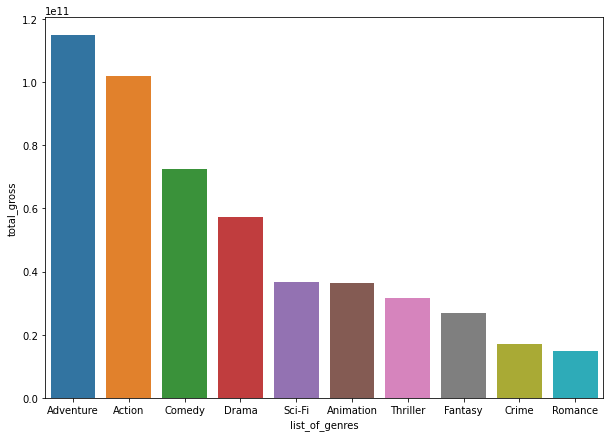

In [169]:
# Need to create a plot using genres and total_gross

plt.figure(figsize=(10, 7))

sns.barplot(
            x='list_of_genres',
            y='total_gross',
            data=top_10_movie_gross);

## Runtime Minutes DF

In [221]:
run_time_df = df_no_duplicates.copy()
run_time_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00","[Action, Adventure, Fantasy]"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00",[Thriller]
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00","[Biography, Documentary, History]"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",[Drama]
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00","[Comedy, Drama, Romance]"


In [222]:
max_runtime_df = run_time_df.sort_values(by=['runtime_minutes'], ascending=False)
max_runtime_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
6067,tt1236371,Mysteries of Lisbon,Mistérios de Lisboa,2010,272.00,"Drama,Mystery,Romance",7.50,"2,928.00",MBox,"111,000.00","14,900.00",2011,"125,900.00","[Drama, Mystery, Romance]"
56699,tt3313066,Coriolanus,National Theatre Live: Coriolanus,2014,192.00,"Drama,History,War",8.70,"1,347.00",Wein.,"757,000.00","315,000.00",2012,"1,072,000.00","[Drama, History, War]"
73161,tt4169250,M.S. Dhoni: The Untold Story,M.S. Dhoni: The Untold Story,2016,184.00,"Biography,Drama,Sport",7.70,"28,343.00",FIP,"1,800,000.00","26,000,000.00",2016,"27,800,000.00","[Biography, Drama, Sport]"
100712,tt5886728,Another Year,You yi nian,2016,181.00,Documentary,7.20,40.00,SPC,"3,200,000.00","16,500,000.00",2010,"19,700,000.00",[Documentary]
34528,tt2278871,Blue Is the Warmest Color,La vie d'Adèle,2013,180.00,"Drama,Romance",7.80,"124,409.00",IFC,"2,200,000.00","5,200,000.00",2013,"7,400,000.00","[Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38579,tt2385006,Jerusalem,Jerusalem,2013,44.00,Documentary,7.30,"1,056.00",NGE,"8,000,000.00","1,300,000.00",2013,"9,300,000.00",[Documentary]
8837,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,Sea Rex 3D: Journey to a Prehistoric World,2010,41.00,Documentary,6.90,364.00,3D,"6,100,000.00","9,900,000.00",2010,"16,000,000.00",[Documentary]
45582,tt2713406,Meerkats,Meerkats,2011,40.00,Documentary,7.40,7.00,NGE,"778,000.00","482,000.00",2012,"1,260,000.00",[Documentary]
54321,tt3195742,Journey to the South Pacific,Journey to the South Pacific,2013,40.00,Documentary,6.50,145.00,Imax,"7,600,000.00","6,500,000.00",2013,"14,100,000.00",[Documentary]


## Plot Runtimes vs Total Gross Earnings

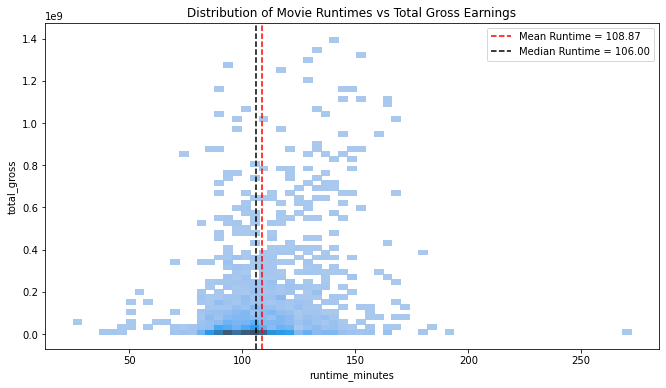

In [260]:
fig, ax = plt.subplots(figsize=(11, 6))
            
sns.histplot(data=max_runtime_df, x='runtime_minutes', 
             y='total_gross', bins='auto')
ax.set(title='Distribution of Movie Runtimes vs Total Gross Earnings');

mean_runtime = round(max_runtime_df['runtime_minutes'].mean(),2)
ax.axvline(mean_runtime, color='red', ls='--',
           label=f"Mean Runtime = {mean_runtime:,.2f}");

median_runtime = round(max_runtime_df['runtime_minutes'].median(),2)
ax.axvline(median_runtime, color='black', ls='--',
           label=f"Median Runtime = {median_runtime:,.2f}");

ax.legend();

# ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');


                    

## Join Movie_Budgets data

In [277]:
movie_prod_no_dups = df_no_duplicates.copy()
movie_prod_no_dups

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]"
19050,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00","[Action, Adventure, Fantasy]"
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]"
6647,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112563,tt6599340,Bluebeard,Haebing,2017,117.00,Thriller,6.40,"1,269.00",Strand,"33,500.00","5,200.00",2010,"38,700.00",[Thriller]
71753,tt4096620,Troublemakers: The Story of Land Art,Troublemakers: The Story of Land Art,2015,72.00,"Biography,Documentary,History",6.50,108.00,FRun,"29,500.00","9,100.00",2016,"38,600.00","[Biography, Documentary, History]"
24172,tt1978447,Policeman,Ha-shoter,2011,105.00,Drama,6.20,766.00,Crnth,"11,300.00","27,000.00",2014,"38,300.00",[Drama]
7416,tt1417067,Cirkus Columbia,Cirkus Columbia,2010,113.00,"Comedy,Drama,Romance",7.30,"2,336.00",Strand,"3,500.00","9,500.00",2012,"13,000.00","[Comedy, Drama, Romance]"


In [271]:
# Calling original movie_budget data

movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [273]:
# Rename 'movie' column to 'original_title' to match column name on both DFs. 

movie_budget_df.rename(columns={'movie': 'original_title'}, inplace=True)
movie_budget_df

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [276]:
# Drop columns from movie_budget_df that are NOT needed for the JOIN with 
# no_duplicates_df.

movie_budget_dropped = movie_budget_df.drop(columns=['release_date', 'domestic_gross', 'worldwide_gross'])
movie_budget_dropped

,id,original_title,production_budget
0,1,Avatar,"$425,000,000"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000"
2,3,Dark Phoenix,"$350,000,000"
3,4,Avengers: Age of Ultron,"$330,600,000"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000"
...,...,...,...
5777,78,Red 11,"$7,000"
5778,79,Following,"$6,000"
5779,80,Return to the Land of Wonders,"$5,000"
5780,81,A Plague So Pleasant,"$1,400"


In [293]:
# Need to remove '$' production_budget column and convert to 
movie_budget_dropped['production_budget'] = movie_budget_dropped['production_budget'].str.replace('$','')
movie_budget_dropped['production_budget']

0       425,000,000
1       410,600,000
2       350,000,000
3       330,600,000
4       317,000,000
           ...     
5777          7,000
5778          6,000
5779          5,000
5780          1,400
5781          1,100
Name: production_budget, Length: 5782, dtype: object

In [310]:
movie_budget_dropped['production_budget'] = movie_budget_dropped['production_budget'].astype(float)
movie_budget_dropped

,id,original_title,production_budget
0,1,Avatar,"425,000,000.00"
1,2,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00"
2,3,Dark Phoenix,"350,000,000.00"
3,4,Avengers: Age of Ultron,"330,600,000.00"
4,5,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00"
...,...,...,...
5777,78,Red 11,"7,000.00"
5778,79,Following,"6,000.00"
5779,80,Return to the Land of Wonders,"5,000.00"
5780,81,A Plague So Pleasant,"1,400.00"


In [311]:
# JOIN movie_prod_no_dups and revised movie_budget_dropped and assign to movie_production_df. 

movie_production_df = pd.merge(movie_prod_no_dups, movie_budget_dropped, how='inner', on='original_title')
movie_production_df

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres,id,production_budget
0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]",4,"330,600,000.00"
1,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]",42,"200,000,000.00"
2,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]",13,"170,000,000.00"
3,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]",56,"150,000,000.00"
4,tt3606756,Incredibles 2,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,"203,510.00",BV,"608,600,000.00","634,200,000.00",2018,"1,242,800,000.00","[Action, Adventure, Animation]",44,"200,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,tt1183923,Welcome to the Rileys,Welcome to the Rileys,2010,110.00,Drama,7.00,"22,210.00",Gold.,"159,000.00","158,000.00",2010,"317,000.00",[Drama],12,"10,000,000.00"
1004,tt2387589,The Girl on the Train,The Girl on the Train,2013,80.00,Thriller,4.40,819.00,Strand,"208,000.00","97,100.00",2010,"305,100.00",[Thriller],68,"45,000,000.00"
1005,tt6333056,City of Ghosts,City of Ghosts,2017,92.00,"Documentary,War",7.40,"2,925.00",IFC,"128,000.00","100,000.00",2017,"228,000.00","[Documentary, War]",64,"17,500,000.00"
1006,tt1788391,Kill List,Kill List,2011,95.00,"Crime,Drama,Horror",6.40,"32,807.00",IFC,"29,100.00","143,000.00",2012,"172,100.00","[Crime, Drama, Horror]",70,"800,000.00"


In [312]:
movie_production_df



,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross,list_of_genres,id,production_budget
0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,"665,594.00",BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00","[Action, Adventure, Sci-Fi]",4,"330,600,000.00"
1,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,"516,148.00",BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00","[Action, Adventure, Sci-Fi]",42,"200,000,000.00"
2,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,"219,125.00",Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00","[Action, Adventure, Sci-Fi]",13,"170,000,000.00"
3,tt1323045,Frozen,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,"62,311.00",BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00","[Adventure, Drama, Sport]",56,"150,000,000.00"
4,tt3606756,Incredibles 2,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,"203,510.00",BV,"608,600,000.00","634,200,000.00",2018,"1,242,800,000.00","[Action, Adventure, Animation]",44,"200,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,tt1183923,Welcome to the Rileys,Welcome to the Rileys,2010,110.00,Drama,7.00,"22,210.00",Gold.,"159,000.00","158,000.00",2010,"317,000.00",[Drama],12,"10,000,000.00"
1004,tt2387589,The Girl on the Train,The Girl on the Train,2013,80.00,Thriller,4.40,819.00,Strand,"208,000.00","97,100.00",2010,"305,100.00",[Thriller],68,"45,000,000.00"
1005,tt6333056,City of Ghosts,City of Ghosts,2017,92.00,"Documentary,War",7.40,"2,925.00",IFC,"128,000.00","100,000.00",2017,"228,000.00","[Documentary, War]",64,"17,500,000.00"
1006,tt1788391,Kill List,Kill List,2011,95.00,"Crime,Drama,Horror",6.40,"32,807.00",IFC,"29,100.00","143,000.00",2012,"172,100.00","[Crime, Drama, Horror]",70,"800,000.00"


## Plot Total Gross vs Budget and Genres

In [313]:
movie_production_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1008 non-null   object 
 1   title              1008 non-null   object 
 2   original_title     1008 non-null   object 
 3   start_year         1008 non-null   int64  
 4   runtime_minutes    1008 non-null   float64
 5   genres             1008 non-null   object 
 6   averagerating      1008 non-null   float64
 7   numvotes           1008 non-null   float64
 8   studio             1008 non-null   object 
 9   domestic_gross     1008 non-null   float64
 10  foreign_gross      1008 non-null   float64
 11  year               1008 non-null   int64  
 12  total_gross        1008 non-null   float64
 13  list_of_genres     1008 non-null   object 
 14  id                 1008 non-null   int64  
 15  production_budget  1008 non-null   float64
dtypes: float64(7), int64(3),

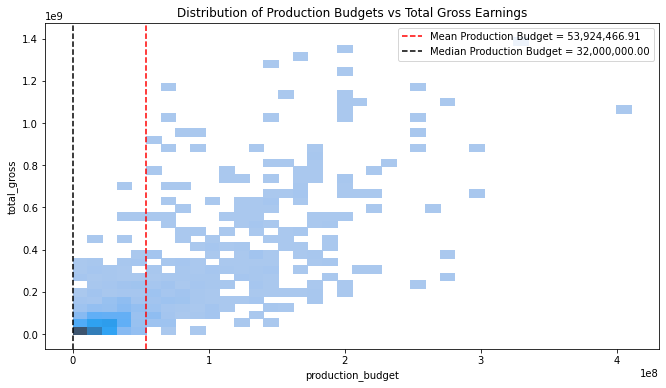

In [319]:
fig, ax = plt.subplots(figsize=(11, 6))
            
sns.histplot(data=movie_production_df, x='production_budget', 
             y='total_gross', bins='auto')
ax.set(title='Distribution of Production Budgets vs Total Gross Earnings');

mean_production_budget = round(movie_production_df['production_budget'].mean(),2)
ax.axvline(mean_production_budget, color='red', ls='--',
           label=f"Mean Production Budget = {mean_production_budget:,.2f}");

median_production_budget = round(movie_production_df['production_budget'].median(),2)
ax.axvline(median_runtime, color='black', ls='--',
           label=f"Median Production Budget = {median_production_budget:,.2f}");

ax.legend();

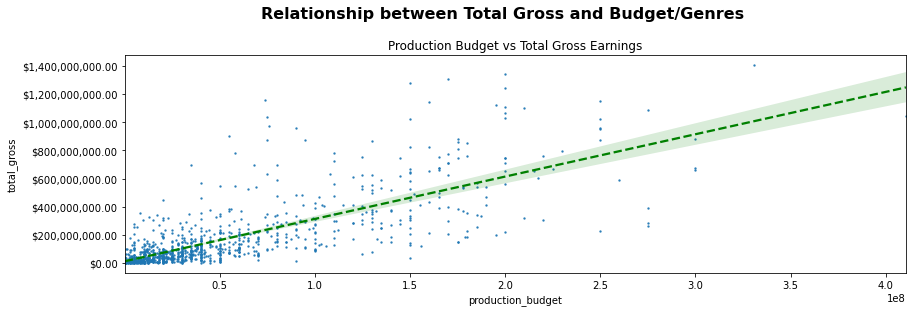

In [327]:
# Relationship between Total Gross and Production Budget and Genres

fig, ax = plt.subplots(figsize=(14,4))

price_fmt = mpl.ticker.StrMethodFormatter('${x:,.2f}')

# Plot 0
sns.regplot(data=movie_production_df, x='production_budget', y='total_gross',
           ax=ax, scatter_kws={'s':2}, line_kws={'color':'green', 'ls':'--'})

ax.set_title('Production Budget vs Total Gross Earnings')
ax.yaxis.set_major_formatter(price_fmt)

fig.suptitle('Relationship between Total Gross and Budget/Genres', y=1.05,
             fontsize=16, fontweight='bold');




